In [1]:
from sklearn.cluster import KMeans
import seaborn as sns

iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Determine the number of distinct species in the data

In [2]:
distinct_species_in_the_data = iris_df['species'].unique()
number_of_species_in_the_data = len(distinct_species_in_the_data)
print(f'Number of distinct species in the data: {number_of_species_in_the_data}')

Number of distinct species in the data: 3


Fit the k-means cluster to the iris_df data

In [3]:
kmeans = KMeans(
    n_clusters = number_of_species_in_the_data,
    random_state=211
).fit(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

Show the number of observations with each correct label being assigned each label by k-means

In [5]:
#  Get the cluster labels and assign them as a column in the DataFrame
cluster_from_kmeans = kmeans.labels_
iris_df['label_kmeans'] = cluster_from_kmeans
#  Show the number of observations for each value of the true label and the one k-means found
iris_df.groupby(['species', 'label_kmeans']).size()

species     label_kmeans
setosa      1               50
versicolor  0                2
            2               48
virginica   0               36
            2               14
dtype: int64

Using .map, change the k-means labels to the species name they're most likely to be

In [6]:
iris_df['label_kmeans_name'] = iris_df['label_kmeans'].map({
    1: 'setosa',
    2: 'versicolor',
    0: 'virginica',
})
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,label_kmeans,label_kmeans_name
0,5.1,3.5,1.4,0.2,setosa,1,setosa
1,4.9,3.0,1.4,0.2,setosa,1,setosa
2,4.7,3.2,1.3,0.2,setosa,1,setosa
3,4.6,3.1,1.5,0.2,setosa,1,setosa
4,5.0,3.6,1.4,0.2,setosa,1,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,virginica
146,6.3,2.5,5.0,1.9,virginica,2,versicolor
147,6.5,3.0,5.2,2.0,virginica,0,virginica
148,6.2,3.4,5.4,2.3,virginica,0,virginica


In [8]:
#  How many are mis-classified?
number_misclassified = (iris_df['label_kmeans_name'] != iris_df['species']).sum()
number_misclassified

16

What are the centroids of each of the k-mean iris_df clusters?

In [9]:
cluster_from_kmeans= kmeans.labels_
iris_df['label_kmeans'] = cluster_from_kmeans
cluster_centroids = iris_df.groupby('label_kmeans')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
cluster_centroids

,sepal_length,sepal_width,petal_length,petal_width
label_kmeans,,,,
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.428000,1.462000,0.246000
2,5.901613,2.748387,4.393548,1.433871


Which points are most distant from each of the clusters?  

In [10]:
iris_df = iris_df.merge(
    cluster_centroids.rename(lambda x: x + '_centroid', axis=1).reset_index(), on='label_kmeans'
)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,label_kmeans,label_kmeans_name,sepal_length_centroid,sepal_width_centroid,petal_length_centroid,petal_width_centroid
0,5.1,3.5,1.4,0.2,setosa,1,setosa,5.006000,3.428000,1.462000,0.246000
1,4.9,3.0,1.4,0.2,setosa,1,setosa,5.006000,3.428000,1.462000,0.246000
2,4.7,3.2,1.3,0.2,setosa,1,setosa,5.006000,3.428000,1.462000,0.246000
3,4.6,3.1,1.5,0.2,setosa,1,setosa,5.006000,3.428000,1.462000,0.246000
4,5.0,3.6,1.4,0.2,setosa,1,setosa,5.006000,3.428000,1.462000,0.246000
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,virginica,6.850000,3.073684,5.742105,2.071053
146,6.3,2.5,5.0,1.9,virginica,2,versicolor,5.901613,2.748387,4.393548,1.433871
147,6.5,3.0,5.2,2.0,virginica,0,virginica,6.850000,3.073684,5.742105,2.071053
148,6.2,3.4,5.4,2.3,virginica,0,virginica,6.850000,3.073684,5.742105,2.071053


In [12]:
distances = (iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] - iris_df[['sepal_length_centroid', 'sepal_width_centroid', 'petal_length_centroid', 'petal_width_centroid']].rename(
    lambda x: x[:-9], axis=1
))**2

iris_df['distance_from_centroid'] = distances.mean(axis=1)
iris_df.sort_values('distance_from_centroid')

,sepal_length,sepal_width,petal_length,petal_width,species,label_kmeans,label_kmeans_name,sepal_length_centroid,sepal_width_centroid,petal_length_centroid,petal_width_centroid,distance_from_centroid
7,5.0,3.4,1.5,0.2,setosa,1,setosa,5.006000,3.428000,1.462000,0.246000,0.001095
39,5.1,3.4,1.5,0.2,setosa,1,setosa,5.006000,3.428000,1.462000,0.246000,0.003295
0,5.1,3.5,1.4,0.2,setosa,1,setosa,5.006000,3.428000,1.462000,0.246000,0.004995
17,5.1,3.5,1.4,0.3,setosa,1,setosa,5.006000,3.428000,1.462000,0.246000,0.005195
49,5.0,3.3,1.4,0.2,setosa,1,setosa,5.006000,3.428000,1.462000,0.246000,0.005595
...,...,...,...,...,...,...,...,...,...,...,...,...
118,7.7,2.6,6.9,2.3,virginica,0,virginica,6.850000,3.073684,5.742105,2.071053,0.585003
60,5.0,2.0,3.5,1.0,versicolor,2,versicolor,5.901613,2.748387,4.393548,1.433871,0.589915
93,5.0,2.3,3.3,1.0,versicolor,2,versicolor,5.901613,2.748387,4.393548,1.433871,0.599512
57,4.9,2.4,3.3,1.0,versicolor,2,versicolor,5.901613,2.748387,4.393548,1.433871,0.627174


If you constructed clusters based on the centroids of the true classes, how good would the clustering be?

In [13]:
class_centroids = iris_df.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
class_centroids

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [18]:
assigned_classes = []
for _, r in iris_df.iterrows():
    distance_from_classes = (r[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] - class_centroids) ** 2
    distance_from_classes = distance_from_classes.mean(axis=1)
    assigned_classes.append(distance_from_classes.sort_values().index[0])
iris_df['best_classes'] = assigned_classes
(iris_df['species'] != iris_df['best_classes']).sum()

11

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

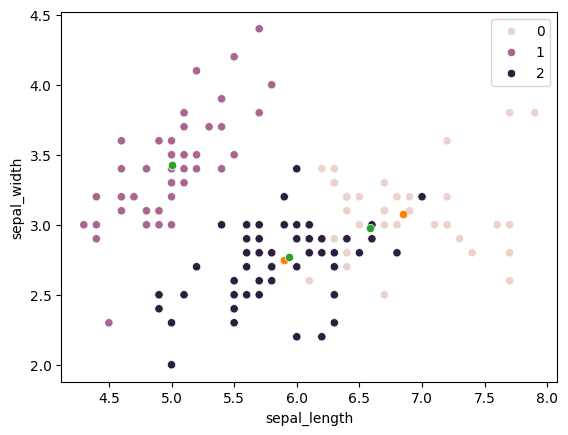

In [19]:
sns.scatterplot(
    x=iris_df['sepal_length'],
    y=iris_df['sepal_width'],
    hue=iris_df['label_kmeans'],
)

sns.scatterplot(
    x=cluster_centroids['sepal_length'],
    y=cluster_centroids['sepal_width'],
)

sns.scatterplot(
    x=class_centroids['sepal_length'],
    y=class_centroids['sepal_width'],
)